In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

**Task 1**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/DS3_CS2_SP6_Hackathon_House_Data_HackathonBrief.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
print(df.shape)

(1460, 81)


In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house_df = df[['MSSubClass','LotArea','GarageCars','GarageArea','BsmtFullBath','GrLivArea','FullBath','SalePrice','YearBuilt','YrSold']]
house_df

,MSSubClass,LotArea,GarageCars,GarageArea,BsmtFullBath,GrLivArea,FullBath,SalePrice,YearBuilt,YrSold
0,60,8450,2,548,1,1710,2,208500,2003,2008
1,20,9600,2,460,0,1262,2,181500,1976,2007
2,60,11250,2,608,1,1786,2,223500,2001,2008
3,70,9550,3,642,1,1717,1,140000,1915,2006
4,60,14260,3,836,1,2198,2,250000,2000,2008
...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,2,460,0,1647,2,175000,1999,2007
1456,20,13175,2,500,1,2073,2,210000,1978,2010
1457,70,9042,1,252,0,2340,2,266500,1941,2010
1458,20,9717,1,240,1,1078,1,142125,1950,2010


In [7]:
AgeWhenSold= house_df.YrSold - house_df.YearBuilt
house_df['AgeWhenSold']= AgeWhenSold
house_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MSSubClass,LotArea,GarageCars,GarageArea,BsmtFullBath,GrLivArea,FullBath,SalePrice,YearBuilt,YrSold,AgeWhenSold
0,60,8450,2,548,1,1710,2,208500,2003,2008,5
1,20,9600,2,460,0,1262,2,181500,1976,2007,31
2,60,11250,2,608,1,1786,2,223500,2001,2008,7
3,70,9550,3,642,1,1717,1,140000,1915,2006,91
4,60,14260,3,836,1,2198,2,250000,2000,2008,8
...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,2,460,0,1647,2,175000,1999,2007,8
1456,20,13175,2,500,1,2073,2,210000,1978,2010,32
1457,70,9042,1,252,0,2340,2,266500,1941,2010,69
1458,20,9717,1,240,1,1078,1,142125,1950,2010,60


In [8]:
df_house=house_df[(house_df.LotArea>40000)&(house_df.GrLivArea>2600)]
df_house

,MSSubClass,LotArea,GarageCars,GarageArea,BsmtFullBath,GrLivArea,FullBath,SalePrice,YearBuilt,YrSold,AgeWhenSold
523,60,40094,3,884,1,4676,3,184750,2007,2007,0
769,60,53504,3,841,1,3279,3,538000,2003,2010,7
1298,60,63887,2,1418,2,5642,2,160000,2008,2008,0


In [9]:
house_df1=house_df.drop([523,769,1298],axis=0)
house_df1

,MSSubClass,LotArea,GarageCars,GarageArea,BsmtFullBath,GrLivArea,FullBath,SalePrice,YearBuilt,YrSold,AgeWhenSold
0,60,8450,2,548,1,1710,2,208500,2003,2008,5
1,20,9600,2,460,0,1262,2,181500,1976,2007,31
2,60,11250,2,608,1,1786,2,223500,2001,2008,7
3,70,9550,3,642,1,1717,1,140000,1915,2006,91
4,60,14260,3,836,1,2198,2,250000,2000,2008,8
...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,2,460,0,1647,2,175000,1999,2007,8
1456,20,13175,2,500,1,2073,2,210000,1978,2010,32
1457,70,9042,1,252,0,2340,2,266500,1941,2010,69
1458,20,9717,1,240,1,1078,1,142125,1950,2010,60


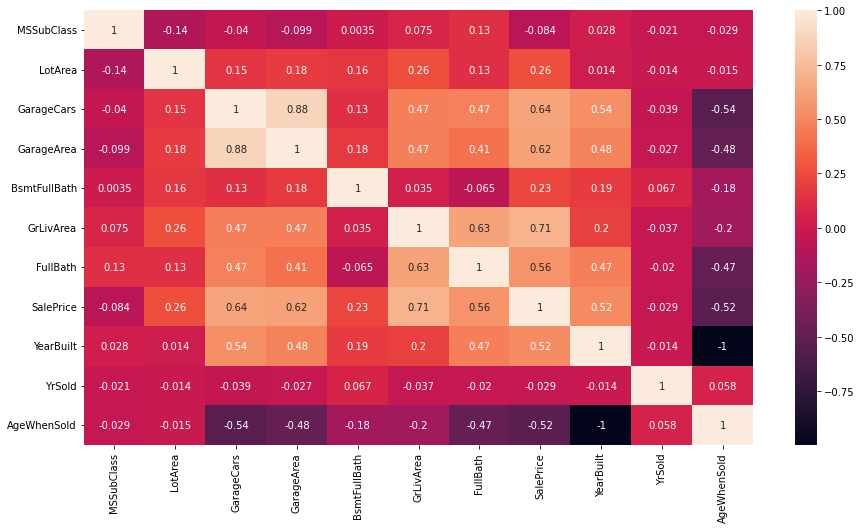

In [10]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(house_df.corr(),annot=True)
plt.show()

**Task 2**

In [12]:
X=np.array(house_df['GrLivArea']).reshape(-1,1)
y=np.array(house_df['SalePrice']).reshape(-1,1)

train_data, test_data, train_label, test_label = train_test_split(X, y, test_size=0.2)

In [13]:
## Set random seed
tf.random.set_seed(42)

## create a model using sequential API (keras)
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape = [1])])

## compiling the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = .01),
                metrics = ['mae'])

## fit the model
history = model_1.fit(train_data,train_label,epochs = 50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
37/37 [==============================] - 1s 2ms/step - loss: 179237.9219 - mae: 179237.9219
Epoch 2/50
37/37 [==============================] - 0s 2ms/step - loss: 178673.8125 - mae: 178673.8125
Epoch 3/50
37/37 [==============================] - 0s 2ms/step - loss: 178110.1719 - mae: 178110.1719
Epoch 4/50
37/37 [==============================] - 0s 2ms/step - loss: 177547.8438 - mae: 177547.8438
Epoch 5/50
37/37 [==============================] - 0s 2ms/step - loss: 176984.6875 - mae: 176984.6875
Epoch 6/50
37/37 [==============================] - 0s 1ms/step - loss: 176421.2656 - mae: 176421.2656
Epoch 7/50
37/37 [==============================] - 0s 2ms/step - loss: 175858.7344 - mae: 175858.7344
Epoch 8/50
37/37 [==============================] - 0s 2ms/step - loss: 175294.8281 - mae: 175294.8281
Epoch 9/50
37/37 [==============================] - 0s 2ms/step - loss: 174731.5156 - mae: 174731.5156
Epoch 10/50
37/37 [==============================] - 0s 2ms/step - loss: 

In [14]:
model_1.evaluate(test_data, test_label, verbose = 0)

[154972.515625, 154972.515625]

In [16]:
X2=np.array(house_df['GrLivArea']).reshape(-1,1)
y2=np.array(house_df['SalePrice']).reshape(-1,1)

train_data2, test_data2, train_label2, test_label2 = train_test_split(X2, y2, test_size=0.3)

In [17]:
## Set random seed
tf.random.set_seed(42)

## create a model using sequential API (keras)
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape = [1])])

## compiling the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = .01),
                metrics = ['accuracy'])

## fit the model
model2 = model_2.fit(train_data2,train_label2,epochs = 100, verbose = 0)

## Evaluate
model_2.evaluate(test_data2, test_label2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


14/14 [==============================] - 0s 3ms/step - loss: 131868.5469 - accuracy: 0.0000e+00


[131868.546875, 0.0]

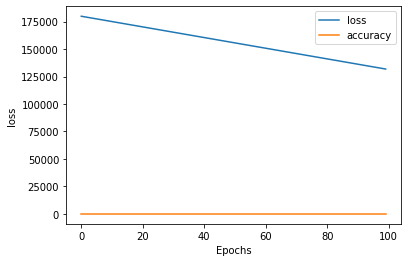

In [18]:
pd.DataFrame(model2.history).plot()
plt.xlabel('Epochs')
plt.ylabel('loss');

In [19]:
pred = model_1.predict(test_data)
pred

array([[29691.273 ],
       [16463.193 ],
       [23315.148 ],
       [30281.303 ],
       [18823.31  ],
       [28815.744 ],
       [28263.781 ],
       [32260.756 ],
       [28644.445 ],
       [32165.59  ],
       [24723.605 ],
       [15302.167 ],
       [22477.686 ],
       [31670.727 ],
       [19203.975 ],
       [27274.055 ],
       [22858.352 ],
       [42215.125 ],
       [19546.572 ],
       [25599.133 ],
       [51655.594 ],
       [43014.52  ],
       [18861.377 ],
       [28454.113 ],
       [36219.664 ],
       [23810.012 ],
       [34297.31  ],
       [46687.93  ],
       [34316.344 ],
       [28225.715 ],
       [28910.91  ],
       [17376.787 ],
       [18785.244 ],
       [32679.486 ],
       [20365.    ],
       [16463.193 ],
       [32184.623 ],
       [34297.31  ],
       [17034.19  ],
       [22706.084 ],
       [37494.887 ],
       [18442.646 ],
       [23200.95  ],
       [20136.602 ],
       [18252.314 ],
       [46954.395 ],
       [28149.582 ],
       [29234

In [20]:
def plot_predictions(train_data = train_data,
                     train_labels = train_label,
                     test_data = test_data,
                     test_labels = test_label,
                     predictions = pred):
  plt.figure(figsize = (10, 5))
  plt.scatter(train_data, train_label, color = 'green', label = 'Training data')
  plt.scatter(test_data, test_label, color = 'yellow', label = 'Testing data')
  plt.scatter(test_data, predictions, color = 'blue', label = 'predictions')
  plt.legend();

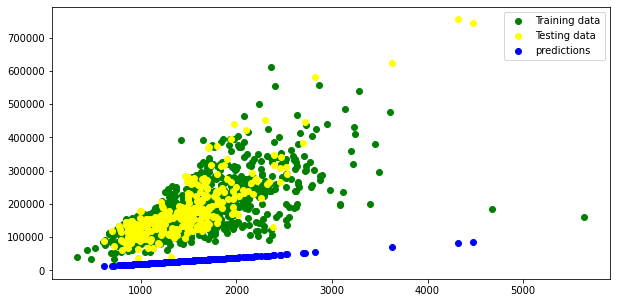

In [21]:
plot_predictions(train_data = train_data,
                     train_labels = train_label,
                     test_data = test_data,
                     test_labels = test_label,
                     predictions = pred)

In [22]:
import itertools
seeds = range(10,33,7)
test = range(20,31,5)

values = []
for s,t in itertools.product(seeds,test):

  train_data2, test_data2, train_label2, test_label2 = train_test_split(X2, y2, test_size=t/100)

  ## set seed
  tf.random.set_seed(s)
  
  ## create a model using sequential API (keras)
  model_2 = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape = [1])])
  
  ## compiling the model
  model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = .3),
                metrics = ['accuracy'])
  ## fit the model
  model2 = model_2.fit(train_data2,train_label2,epochs = 100, verbose = 0)

  ## Evaluate test data
  m1 = model_2.evaluate(test_data2,test_label2,verbose = 0)

  ## Evaluate train data
  m2 = model_2.evaluate(train_data2,train_label2, verbose = 0)

  values.append([s, t, m1, m2])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
col = ['Seed','Test_size','Test_mae','Train_mae']
h_df2 = pd.DataFrame(values,columns = col)
h_df2

,Seed,Test_size,Test_mae,Train_mae
0,10,20,"[37590.625, 0.0]","[38561.77734375, 0.0]"
1,10,25,"[39484.90234375, 0.0]","[37991.17578125, 0.0]"
2,10,30,"[36550.8046875, 0.0]","[39142.98828125, 0.0]"
3,17,20,"[37933.546875, 0.0]","[38486.3671875, 0.0]"
4,17,25,"[37074.3046875, 0.0]","[38792.91796875, 0.0]"
5,17,30,"[41166.30859375, 0.0]","[37185.40234375, 0.0]"
6,24,20,"[35725.7734375, 0.0]","[39035.76171875, 0.0]"
7,24,25,"[38991.99609375, 0.0]","[38159.1640625, 0.0]"
8,24,30,"[36694.4453125, 0.0]","[39091.2734375, 0.0]"
9,31,20,"[37647.97265625, 0.0]","[38559.578125, 0.0]"


**Task 3**

In [25]:
# Create a X and y
X3 = house_df.drop(['SalePrice'], axis=1)
y3 = house_df['SalePrice']

# Build a train and test dataset
train_data3, test_data3, train_label3, test_label3 = train_test_split(X3, y3, test_size=0.25)

In [26]:
# Building a model

tf.random.set_seed(42)

# Replicating the original model
model_3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# Compile a model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr = .3),
                metrics=['accuracy'])

# Fitting a model
model3 = model_3.fit(train_data3,train_label3, epochs=100,verbose=0) 

## Evaluate
model_3.evaluate(test_data3, test_label3)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 0s 2ms/step - loss: 27671.4434 - accuracy: 0.0000e+00


[27671.443359375, 0.0]

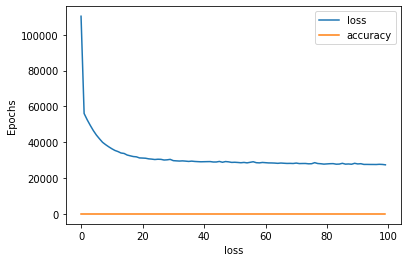

In [27]:
# plot the history 
pd.DataFrame(model3.history).plot()
plt.xlabel('loss')
plt.ylabel('Epochs')
plt.show()

**Task 4**

In [28]:
## set random seed
tf.random.set_seed(42)

## create the model
model_4= tf.keras.Sequential([
          tf.keras.layers.Dense(6, input_shape = [1], activation =tf.keras.activations.relu),                   
          tf.keras.layers.Dense(3,activation =tf.keras.activations.relu),
          tf.keras.layers.Dense(2,activation =tf.keras.activations.relu),
          tf.keras.layers.Dense(1)
])

## compile the model
model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr=.3),
                metrics = ['accuracy'])

## fit the model
model4 = model_4.fit(train_data2,train_label2,epochs = 100, verbose = 0)

## Evaluate
model_4.evaluate(test_data2, test_label2)

model_4.evaluate(train_data2, train_label2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 2ms/step - loss: 39912.4844 - accuracy: 0.0000e+00


[39912.484375, 0.0]

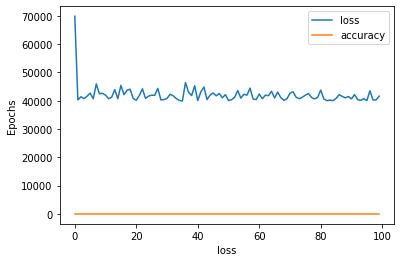

In [29]:
pd.DataFrame(model4.history).plot()
plt.xlabel('loss')
plt.ylabel('Epochs')
plt.show()

In [30]:
## Multi_layer in multi-dimensional regression

In [31]:
tf.random.set_seed(42)

## create the model
model_4_1= tf.keras.Sequential([
          tf.keras.layers.Dense(6,activation =tf.keras.activations.relu),                   
          tf.keras.layers.Dense(3,activation =tf.keras.activations.relu),
          tf.keras.layers.Dense(2,activation =tf.keras.activations.relu),
          tf.keras.layers.Dense(1)
])
## compile the model
model_4_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr=.3),
                metrics = ['accuracy'])

## fit the model
model41 = model_4_1.fit(train_data3,train_label3,epochs = 100, verbose = 0)

## Evaluate
model_4_1.evaluate(test_data3, test_label3)

model_4_1.evaluate(train_data3, train_label3)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


35/35 [==============================] - 0s 3ms/step - loss: 27172.9512 - accuracy: 0.0000e+00


[27172.951171875, 0.0]

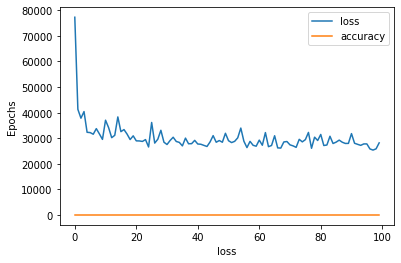

In [32]:
pd.DataFrame(model41.history).plot()
plt.xlabel('loss')
plt.ylabel('Epochs')
plt.show()

In [33]:
#Binary Classification

**Task 5**

In [35]:
## building binary class 
house_df['BathClass'] = np.array(list(map(lambda x : 0 if x <=1 else 1 , house_df['FullBath'])))
house_df['BathClass'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    801
0    659
Name: BathClass, dtype: int64

In [38]:
df_h5 = house_df[['GrLivArea','BathClass']]

# Build a train and test dataset

X_train, X_test, y_train, y_test = train_test_split(df_h5['GrLivArea'], df_h5['BathClass'], test_size=0.25)

## set random seed
tf.random.set_seed(42)

## create the model
## Combination of linear and non-linear activation function
model_5= tf.keras.Sequential([
          tf.keras.layers.Dense(4, input_shape = [1], activation ='relu'),
          tf.keras.layers.Dense(1,activation ='sigmoid')
])

## compile the model
model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])
## fit the model
model5 = model_5.fit(X_train,y_train,epochs = 100, verbose = 0)

## Evaluate
model_5.evaluate(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.8027


[0.5336652398109436, 0.8027397394180298]

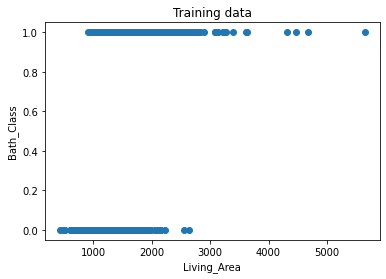

In [39]:
plt.figure()
plt.scatter(X_train, y_train)
plt.xlabel('Living_Area')
plt.ylabel('Bath_Class')
plt.title('Training data');

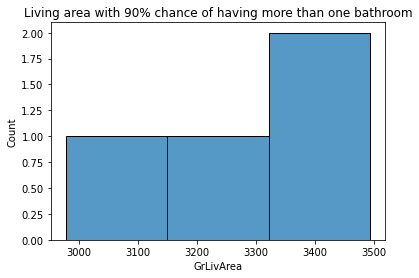

In [41]:
pred_5 = model_5.predict(X_test)
sns.histplot(X_test[np.squeeze(pred_5>= 0.90)])
plt.title('Living area with 90% chance of having more than one bathroom');

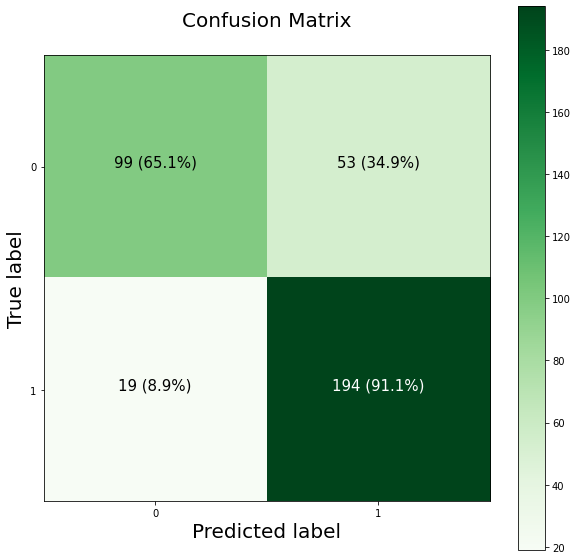

In [42]:
from sklearn.metrics import confusion_matrix
import itertools

figsize=(10,10)

## create confusion matrix
cm = confusion_matrix(y_test,tf.round(pred_5))
cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis] ## normalize it
n_classes = cm.shape[0]

## prettify it
fig,ax = plt.subplots(figsize=figsize)
## create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Greens)
fig.colorbar(cax)

## create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

## label the axis
ax.set(title='Confusion Matrix',
       xlabel='Predicted label',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

## set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

## adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

## set threshold for different colors
threshold = (cm.max()+cm.min())/2.

## plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
           horizontalalignment = 'center',
           color = 'white' if cm[i,j]>threshold else 'black',
           size = 15)

In [43]:
confusion_matrix(y_test,tf.round(pred_5))

array([[ 99,  53],
       [ 19, 194]])

In [48]:
lr_prob=model_5.predict(pd.DataFrame(np.array(X_test)))
df.loc[np.where(lr_prob[:,0]>0.50)]['GrLivArea']

0      1710
3      1717
4      2198
7      2090
8      1774
       ... 
357    1142
359    1924
361    1505
362    1922
363     987
Name: GrLivArea, Length: 247, dtype: int64

In [49]:
ns_probs = [0 for _ in range(len(y_test))]

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob[:,0])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.874


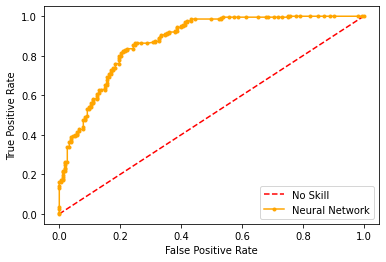

In [51]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_prob)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot(ns_fpr, ns_tpr, color='red', linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr,color='orange', marker='.', label='Neural Network')

plt.legend()
plt.show()

In [52]:
#Multi Class Classification

In [54]:
house_df['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [57]:
df_hs = house_df[['YearBuilt','LotArea','GarageCars']].copy()
df_hs = df_hs[(df_hs.GarageCars < 4) & (df_hs.GarageCars > 0)]
df_hs.shape, house_df.shape

((1374, 3), (1460, 12))

In [58]:
X_train,X_test,y_train,y_test = train_test_split(df_hs[['YearBuilt','LotArea']],df_hs['GarageCars'],test_size = .2,random_state=42)

In [59]:
## set random seed
tf.random.set_seed(42)

## create the model
## Combination of linear and non-linear activation function
model_6 = tf.keras.Sequential([                     
          tf.keras.layers.Dense(6,activation ='relu'),
          tf.keras.layers.Dense(3,activation ='relu'),
          tf.keras.layers.Dense(4,activation ='softmax')]) ## output shape is 4

## compile the model
model_6.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), ## different loss function
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
## fit the model
model6 = model_6.fit(X_train,
                                 y_train,
                                 epochs = 10,
                                 verbose = 0,
                                 validation_data=(X_test,y_test))

pred_6 = model_6.predict(X_test)
pred6_fin = pred_6.argmax(axis = 1)
pred6_fin

array([1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1])

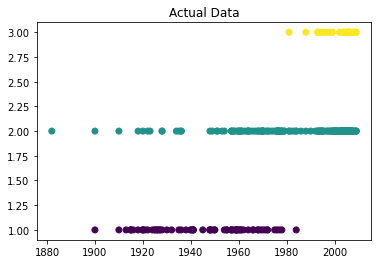

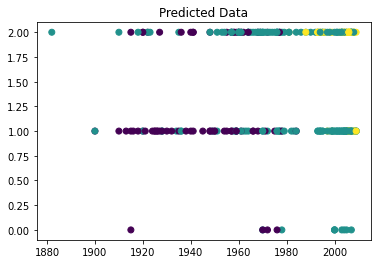

In [60]:
## plot testing data
plt.scatter(X_test.iloc[:,0],y_test,c=y_test)
plt.title('Actual Data')
plt.show()

## plot predicted data
plt.scatter(X_test.iloc[:,0],pred6_fin,c=y_test)
plt.title('Predicted Data');